In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_3d_graph
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

In [45]:
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('../data/PLdata_bh_34.mat', 26.16 * np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('../data/PLdata_bh_53.mat', 26.16 * np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('../data/PLdata_bh_64.mat', 26.16 * np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('../data/PLdata_ma_34.mat', 26.16 * np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('../data/PLdata_ma_53.mat', 26.16 * np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('../data/PLdata_ma_64.mat', 26.16 * np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


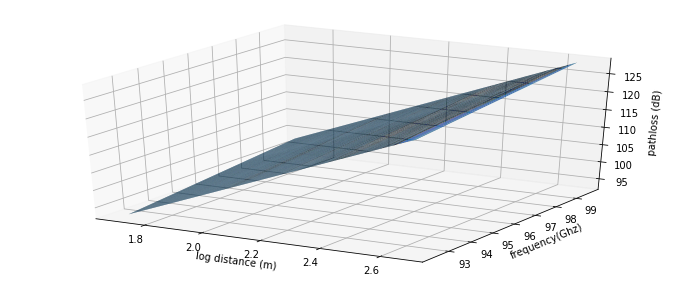

train_error(RMSE) : 7.289204763718953
validation_error(RMSE) : 7.369006509224551
test_error(RMSE) : 7.218625715300023
-----------------------------------------------------------------------------------------------


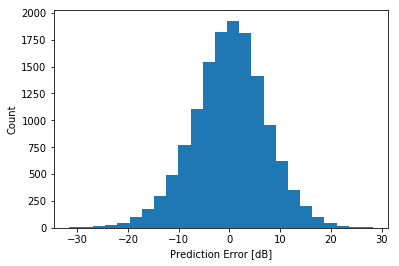

       Error(Noise) Distribution
count                13875.00000
mean                     0.00005
std                      7.28947
min                    -31.65950
25%                     -4.53938
50%                      0.23359
75%                      4.73881
max                     28.34265


In [52]:
model = mlp_regression(X_train_bh, y_train_bh, (60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_bh, y_train_bh)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Bundang>")
mlp_train_3d_graph(model,X_train_bh, y_train_bh)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_bh, y_train_bh)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_bh, y_val_bh)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_bh, y_test_bh)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_bh), y_train_bh)

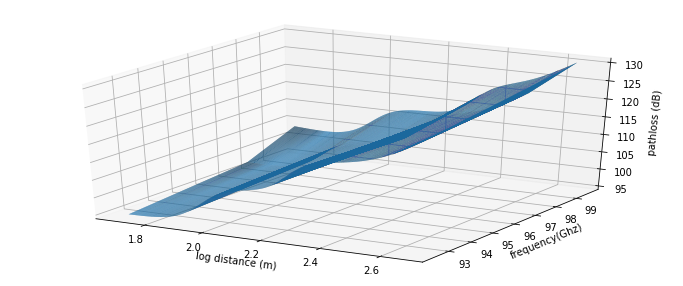

train_error(RMSE) : 7.162892712357049
validation_error(RMSE) : 7.215730475662382
test_error(RMSE) : 7.161455167471411
-----------------------------------------------------------------------------------------------


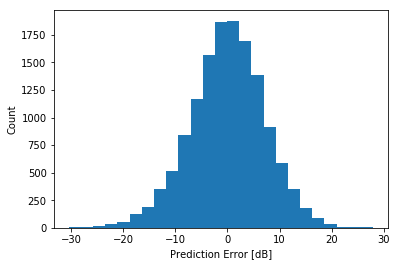

       Error(Noise) Distribution
count                13875.00000
mean                    -0.00114
std                      7.16315
min                    -30.43446
25%                     -4.44455
50%                      0.19045
75%                      4.73365
max                     27.94158


In [50]:
model = mlp_regression(X_train_bh, y_train_bh, (60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_bh, y_train_bh)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_3d_graph(model,X_train_bh, y_train_bh)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_bh, y_train_bh)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_bh, y_val_bh)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_bh, y_test_bh)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_bh), y_train_bh)

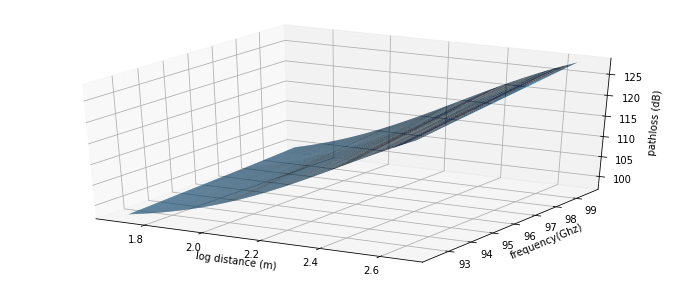

train_error(RMSE) : 7.297227543988872
validation_error(RMSE) : 7.386112765303912
test_error(RMSE) : 7.259149436490628
-----------------------------------------------------------------------------------------------


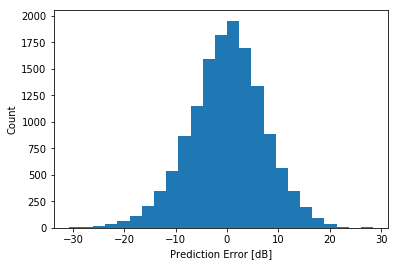

       Error(Noise) Distribution
count                13875.00000
mean                     0.00003
std                      7.29749
min                    -30.80332
25%                     -4.52142
50%                      0.24422
75%                      4.75952
max                     28.46752


In [51]:
model = mlp_regression(X_train_bh, y_train_bh, (60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_bh, y_train_bh)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_3d_graph(model,X_train_bh, y_train_bh)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_bh, y_train_bh)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_bh, y_val_bh)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_bh, y_test_bh)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_bh), y_train_bh)

<Mokdong>


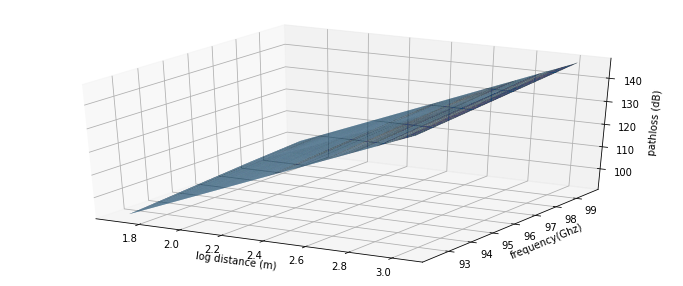

train_error(RMSE) : 7.163148373752359
validation_error(RMSE) : 6.972571874929099
test_error(RMSE) : 7.115435743779592
-----------------------------------------------------------------------------------------------


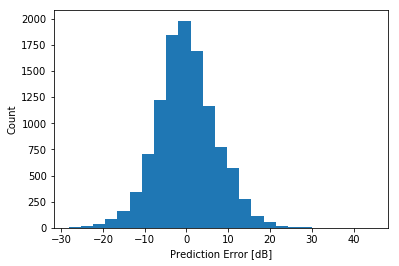

       Error(Noise) Distribution
count                11080.00000
mean                     0.00054
std                      7.16347
min                    -28.16697
25%                     -4.53298
50%                     -0.32706
75%                      4.36593
max                     44.70040


In [53]:
model = mlp_regression(X_train_ma, y_train_ma, (60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_ma, y_train_ma)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Mokdong>")
mlp_train_3d_graph(model,X_train_ma, y_train_ma)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_ma, y_train_ma)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_ma, y_val_ma)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_ma, y_test_ma)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_ma), y_train_ma)

<Mokdong>


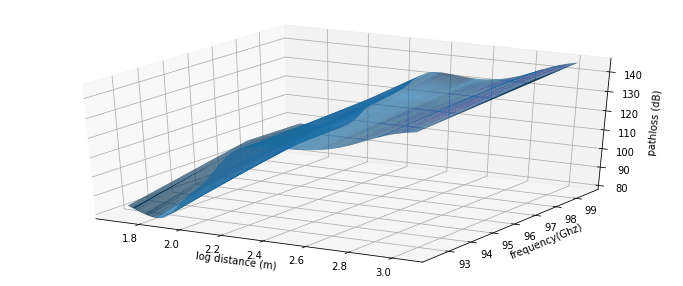

train_error(RMSE) : 6.218909411010622
validation_error(RMSE) : 6.045980668889313
test_error(RMSE) : 6.094486193491203
-----------------------------------------------------------------------------------------------


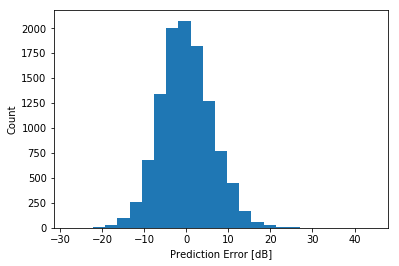

       Error(Noise) Distribution
count                11080.00000
mean                     0.00264
std                      6.21919
min                    -27.88007
25%                     -4.13310
50%                     -0.29305
75%                      3.93131
max                     44.42167


In [55]:
model = mlp_regression(X_train_ma, y_train_ma, (60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_ma, y_train_ma)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Mokdong>")
mlp_train_3d_graph(model,X_train_ma, y_train_ma)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_ma, y_train_ma)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_ma, y_val_ma)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_ma, y_test_ma)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_ma), y_train_ma)

<Mokdong>


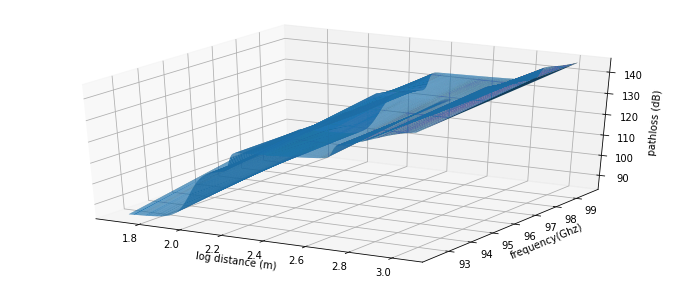

train_error(RMSE) : 6.367130076379262
validation_error(RMSE) : 6.156947827942102
test_error(RMSE) : 6.257536113721854
-----------------------------------------------------------------------------------------------


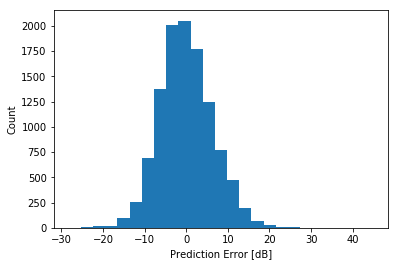

       Error(Noise) Distribution
count                11080.00000
mean                    -0.00638
std                      6.36741
min                    -28.20830
25%                     -4.30940
50%                     -0.41268
75%                      3.99991
max                     44.92577


In [56]:
model = mlp_regression(X_train_ma, y_train_ma, (60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_train_ma, y_train_ma)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
print("<Mokdong>")
mlp_train_3d_graph(model,X_train_ma, y_train_ma)
print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_train_ma, y_train_ma)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_val_ma, y_val_ma)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_test_ma, y_test_ma)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_train_ma), y_train_ma)